In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
ncap_funding = pd.read_csv("NCAP_Funding.csv")
state_data = pd.read_csv("State_data.csv")

type(data)
type(ncap_funding)
type(state_data)

pandas.core.frame.DataFrame

In [7]:
display(data.head(20))
display(ncap_funding.head())
display(state_data.head())

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-01,"Alandi, Pune - IITM",NaN,NaN,System Of Air Quality And weather Forecasting ...,Pune,18.675076,73.892743,Maharashtra
6,2017-01-01,"Alandur Bus Depot, Chennai - CPCB",43.401979,NaN,"MKN Rd, St Thomas Mount, Chennai, Tamil Nadu 6...",Chennai,12.909916,80.107654,Tamil Nadu
7,2017-01-01,"Alipur, Delhi - DPCC",NaN,NaN,Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi
8,2017-01-01,"Ambazari, Nagpur - MPCB",NaN,NaN,"Beside SBI VRC Opp. to NPTI South, Ambazari Ro...",Nagpur,21.121801,79.049520,Maharashtra
9,2017-01-01,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NaN,NaN,"Sri Venkateswara Anam Kala Kendram, Lakshmivar...",Rajamahendravaram,16.987287,81.736318,Andhra Pradesh


,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


Spatial Aggregation

In [8]:
#Question1 --------------->>>>>
avg_pm25 = data.groupby("state")["PM2.5"].mean()

highest_avg_state = avg_pm25.idxmax()
highest_avg_value = avg_pm25.max()
print(f"State with hightest average PM2.5 is {highest_avg_state} with {highest_avg_value}  µg/m³")

State with hightest average PM2.5 is Delhi with 104.1009176780069  µg/m³


In [9]:
#Question2 ------------->>>
# Convert Timestamp column to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Year"] = data["Timestamp"].dt.year
# display(data)
hazard_2023 = data[(data["Year"] == 2023) & (data["PM2.5"] > 300)]
# display(hazard_2023)
hazardous_state = hazard_2023["state"].value_counts().idxmax()
print(f"State with most hazardous PM2.5 days in 2023: {hazardous_state}")

State with most hazardous PM2.5 days in 2023: Delhi


In [10]:
#Question3------------------>>>>>
variability_2023 = data[data["Year"] == 2023].groupby("state")["PM2.5"].std()
highest_variability_state = variability_2023.idxmax()
highest_variability_value = variability_2023.max()
print(f"State with highest variability in PM2.5 in 2023: {highest_variability_state} (Std Dev: {highest_variability_value:.2f})")

State with highest variability in PM2.5 in 2023: Delhi (Std Dev: 82.80)


In [11]:
#Question4----------------->>>>>>
covid_period = data[(data["Year"] >= 2020) & (data["Year"] <= 2021)]
lowest_pm25_covid_state = covid_period.groupby("state")["PM2.5"].mean().idxmin()
lowest_pm25_covid_value = covid_period.groupby("state")["PM2.5"].mean().min()

print(f"State with lowest average PM2.5 during Covid (2020-2021): {lowest_pm25_covid_state} ({lowest_pm25_covid_value:.2f} µg/m³)")

State with lowest average PM2.5 during Covid (2020-2021): Mizoram (14.32 µg/m³)


Temporal Aggregation

In [12]:
#Question1--------->>
# 1. Station with the highest PM2.5 value in August 2020 -->
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Month"] = data["Timestamp"].dt.month

aug_2020 = data[(data["Year"] == 2020) & (data["Month"] == 8)]
highest_station_aug_2020 = aug_2020.loc[aug_2020["PM2.5"].idxmax(), "station"]
highest_value_aug_2020 = aug_2020["PM2.5"].max()

print(f"Station with highest PM2.5 in Aug 2020: {highest_station_aug_2020} ({highest_value_aug_2020:.2f} µg/m³)")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


In [13]:
#Question2----------->>
# 2. Seasonal average PM2.5 for 2018 at specific stations
season_def = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

stations = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
seasonal_avg_2018 = {}

for season, months in season_def.items():
    seasonal_data = data[(data["Year"] == 2018) & (data["Month"].isin(months)) & (data["station"].isin(stations))]
    seasonal_avg_2018[season] = seasonal_data["PM2.5"].mean()

highest_pollution_season = max(seasonal_avg_2018, key=seasonal_avg_2018.get)

print(f"Season with highest PM2.5 in 2018 at given stations: {highest_pollution_season}")

Season with highest PM2.5 in 2018 at given stations: Winter


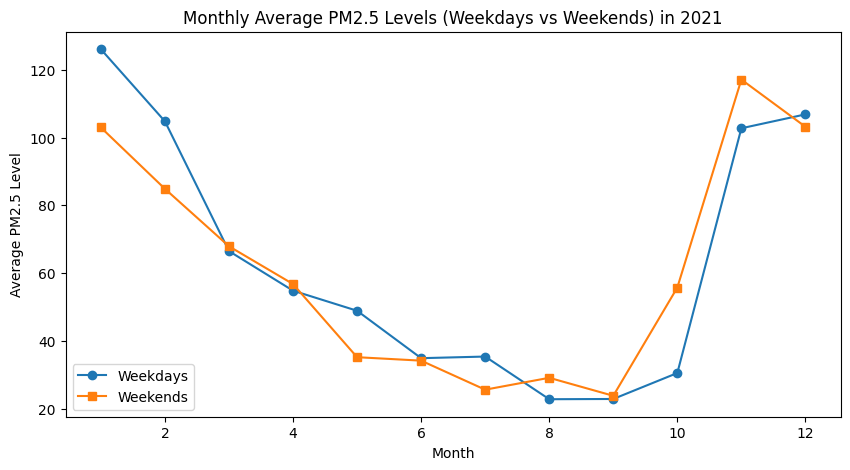

In [14]:
#Question3------------->>
import matplotlib.pyplot as plt
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Day"] = data["Timestamp"].dt.day
data_2021 = data[data["Year"] == 2021]
weekday_avg = data_2021[data_2021["Day"] < 5].groupby("Month")["PM2.5"].mean()
weekend_avg = data_2021[data_2021["Day"] >= 5].groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10,5))
plt.plot(weekday_avg.index, weekday_avg.values, label='Weekdays', marker='o')
plt.plot(weekend_avg.index, weekend_avg.values, label='Weekends', marker='s')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021')
plt.legend()
plt.show()

Spatial Temporal Aggregation

In [15]:
#Question1--------------------->>>>>>>>>

#Percentage change in PM2.5 levels between monsoon and summer in 2022
monsoon_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Monsoon"]))].groupby("state")["PM2.5"].mean()
summer_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Summer"]))].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_2022 - summer_2022) / summer_2022) * 100
state_max_change = percentage_change.idxmax()
max_change_value = percentage_change.max()

print(f"State with most change in PM2.5 levels from Summer to Monsoon in 2022: {state_max_change} ({max_change_value:.2f}%)")

State with most change in PM2.5 levels from Summer to Monsoon in 2022: Jammu and Kashmir (-0.00%)


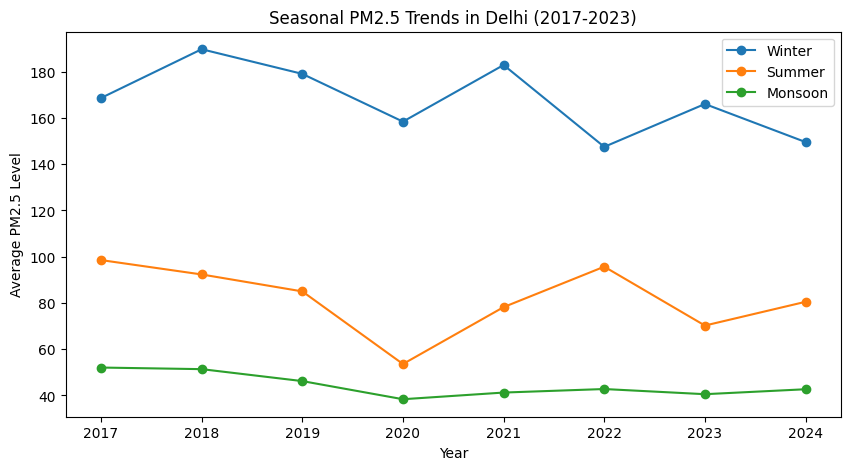

In [16]:
#Question2----------------->>>>>>>
#Seasonal PM2.5 trends for Delhi from 2017-2023
delhi_data = data[data["state"] == "Delhi"]
seasonal_pm25 = {season: delhi_data[delhi_data["Month"].isin(months)].groupby("Year")["PM2.5"].mean() for season, months in season_def.items()}

plt.figure(figsize=(10,5))
for season, values in seasonal_pm25.items():
    plt.plot(values.index, values.values, label=season, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Seasonal PM2.5 Trends in Delhi (2017-2023)')
plt.legend()
plt.show()


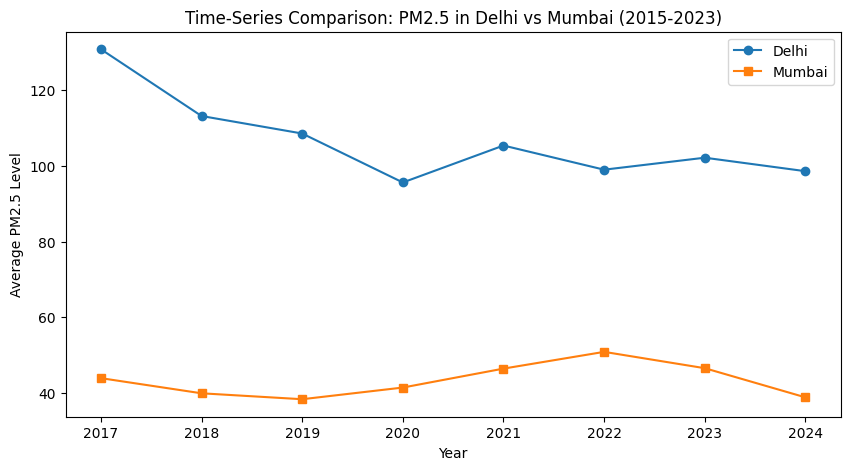

In [17]:
#Question3 ------------------------>>>
#Time-series comparison of Delhi and Mumbai PM2.5 levels
delhi_pm25 = data[data["state"] == "Delhi"].groupby("Year")["PM2.5"].mean()
mumbai_pm25 = data[data["state"] == "Maharashtra"].groupby("Year")["PM2.5"].mean()
plt.figure(figsize=(10,5))
plt.plot(delhi_pm25.index, delhi_pm25.values, label='Delhi', marker='o')
plt.plot(mumbai_pm25.index, mumbai_pm25.values, label='Mumbai', marker='s')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Time-Series Comparison: PM2.5 in Delhi vs Mumbai (2015-2023)')
plt.legend()
plt.show()

# Population Based

In [18]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
file_path = "Data.csv"
df = pd.read_csv(file_path)
df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#population_ques1
df_clean = df.dropna(subset=['state', 'PM2.5'])
state_avg_pm25 = df_clean.groupby('state')['PM2.5'].mean().reset_index()
highest_pm25_state = state_avg_pm25.loc[state_avg_pm25['PM2.5'].idxmax()]
print(highest_pm25_state)

state         Delhi
PM2.5    104.100918
Name: 6, dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12784\2535537850.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='per_capita_PM2.5', data=top_5_states, palette="Reds")


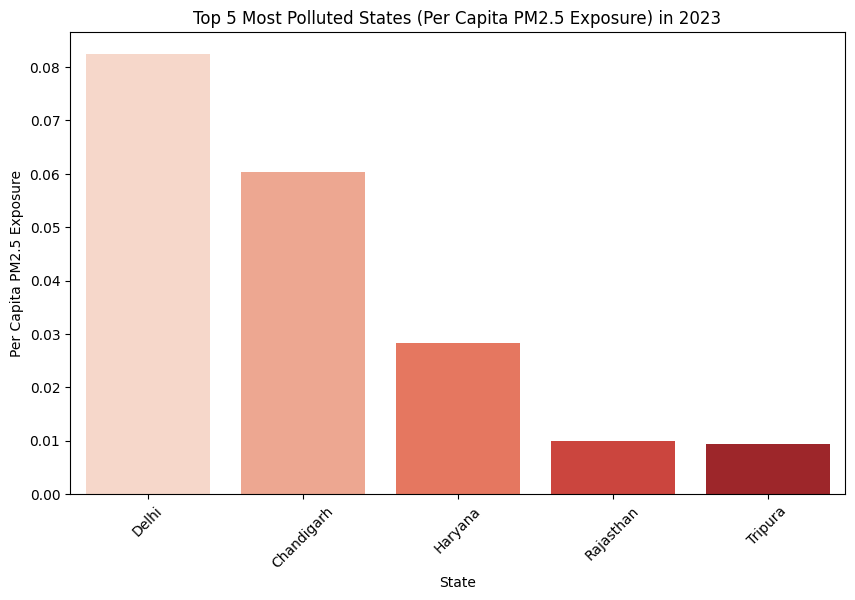

In [22]:
#ques2
import seaborn as sns


state_data_path = "State_data.csv"
state_info = pd.read_csv(state_data_path)  

# Convert column names to lowercase and strip spaces
state_info.columns = state_info.columns.str.lower().str.strip()


# Drop NaN values for PM2.5 and state, ensure we get a copy
df_clean = df.dropna(subset=['PM2.5', 'state']).copy()

# Convert Timestamp to datetime and extract year
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['year'] = df_clean['Timestamp'].dt.year

# Filter data for 2023
df_2023 = df_clean[df_clean['year'] == 2023]

# Compute total PM2.5 per state
state_pm25 = df_2023.groupby('state', as_index=False)['PM2.5'].sum()

# Convert column names to lowercase
state_pm25.columns = state_pm25.columns.str.lower().str.strip()

# Merge with state population data
merged_data = pd.merge(state_pm25, state_info, on='state', how='inner')


# Fix 'population' column name if needed
if 'population' not in merged_data.columns:
    raise KeyError("Column 'population' not found in merged_data")

# Compute per capita PM2.5 exposure
merged_data['per_capita_PM2.5'] = merged_data['pm2.5'] / merged_data['population']

# Get top 5 most polluted states
top_5_states = merged_data.nlargest(5, 'per_capita_PM2.5').sort_values(by='per_capita_PM2.5', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='per_capita_PM2.5', data=top_5_states, palette="Reds")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure) in 2023")
plt.xticks(rotation=45)
plt.show()


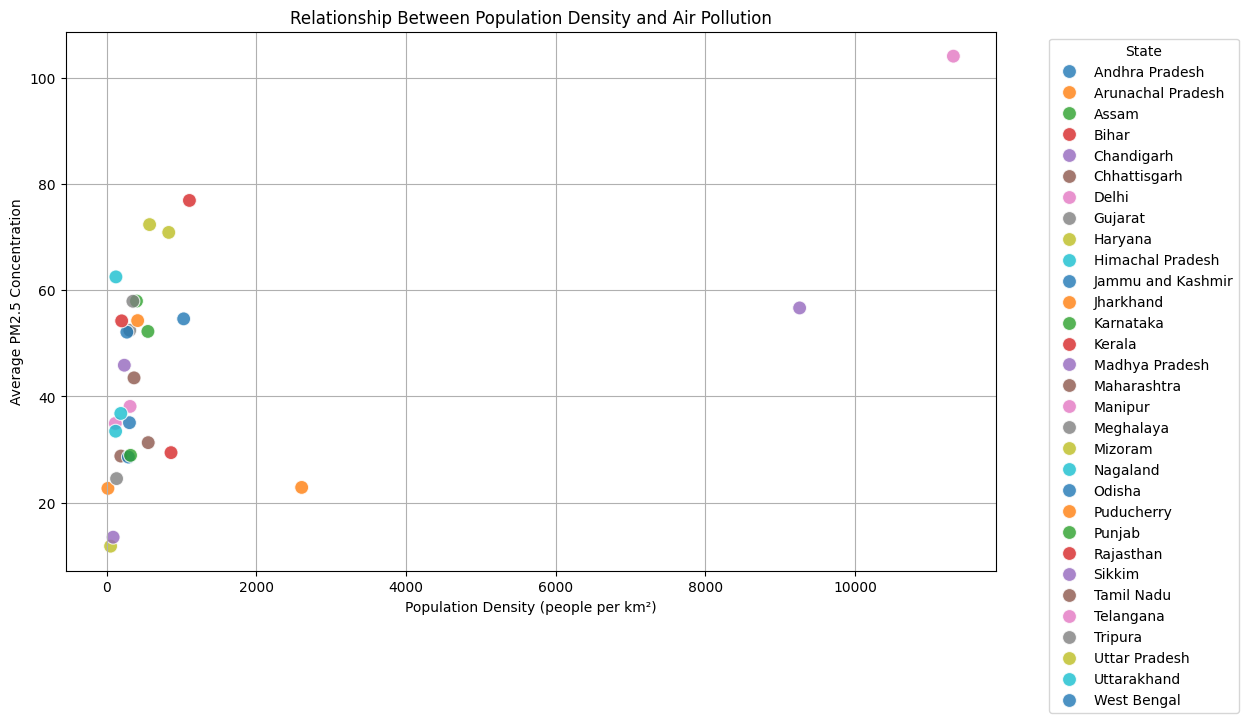

In [23]:
#ques3
# Compute population density
state_info['population_density'] = state_info['population'] / state_info['area (km2)']

# Drop NaN values for PM2.5 and state, ensure a copy is made
df_clean = df.dropna(subset=['PM2.5', 'state']).copy()

# Compute average PM2.5 per state
state_pm25 = df_clean.groupby('state', as_index=False)['PM2.5'].mean()

# Merge PM2.5 data with state information
merged_data = pd.merge(state_pm25, state_info, on='state', how='inner')

# Scatter plot with different colors for each state
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=merged_data['population_density'],
    y=merged_data['PM2.5'],
    hue=merged_data['state'],  # Different colors for each state
    palette="tab10",  # Use a distinct color palette
    s=100,  # Size of points
    alpha=0.8
)

# Add labels and title
plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and Air Pollution")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.show()


# Area Based

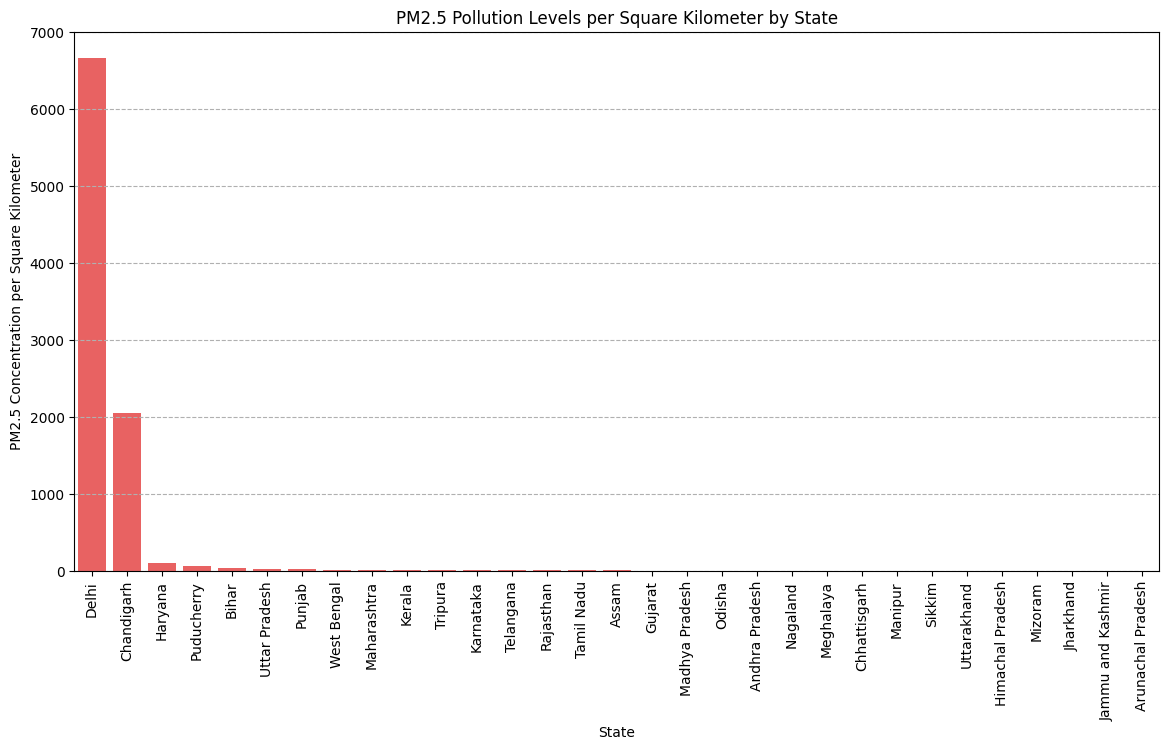

In [39]:
#area_ques1
# Standardize column names
state_info.columns = state_info.columns.str.lower().str.strip()

# Ensure area is numeric
state_info['area (km2)'] = pd.to_numeric(state_info['area (km2)'])

# Drop missing values in PM2.5 and state
df_clean = df.dropna(subset=['PM2.5', 'state']).copy()

# Compute total PM2.5 per state
state_pm25 = df_clean.groupby('state', as_index=False)['PM2.5'].sum()

# Standardize PM2.5 column names
state_pm25.columns = state_pm25.columns.str.lower().str.strip()

# Merge with state info
merged_data = pd.merge(state_pm25, state_info, on='state', how='inner')

# Compute PM2.5 concentration per square kilometer
merged_data['pm2.5_per_km2'] = merged_data['pm2.5'] / merged_data['area (km2)']

# Sort states by PM2.5 concentration per square kilometer
merged_data = merged_data.sort_values(by='pm2.5_per_km2', ascending=False)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x=merged_data['state'],
    y=merged_data['pm2.5_per_km2'],
    color='r',
    alpha = 0.7
)

plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per Square Kilometer")
plt.title("PM2.5 Pollution Levels per Square Kilometer by State")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


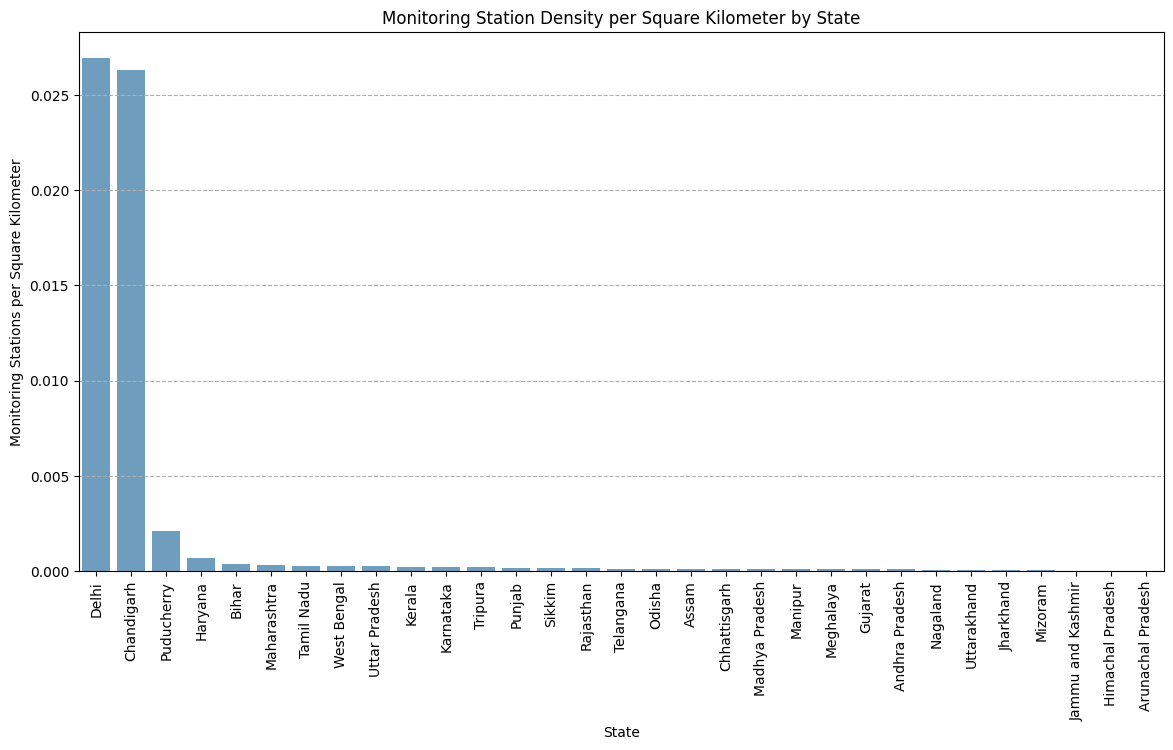

In [30]:
#ques2 
#Count unique monitoring stations per state
station_counts = df_clean.groupby('state')['station'].nunique().reset_index()
station_counts.columns = ['state', 'num_stations']

# Merge with state area data
merged_data = pd.merge(station_counts, state_info, on='state', how='inner')

# Compute monitoring stations per square kilometer
merged_data['stations_per_km2'] = merged_data['num_stations'] / merged_data['area (km2)']

# Sort states by station density
merged_data = merged_data.sort_values(by='stations_per_km2', ascending=False)

# Bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x=merged_data['state'],
    y=merged_data['stations_per_km2'],
    alpha = 0.7
)

plt.xlabel("State")
plt.ylabel("Monitoring Stations per Square Kilometer")
plt.title("Monitoring Station Density per Square Kilometer by State")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


Index(['timestamp', 'station', 'pm2.5', 'pm10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12784\1141926948.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_analysis['state'], y=merged_analysis['pm2.5'], palette="Blues")


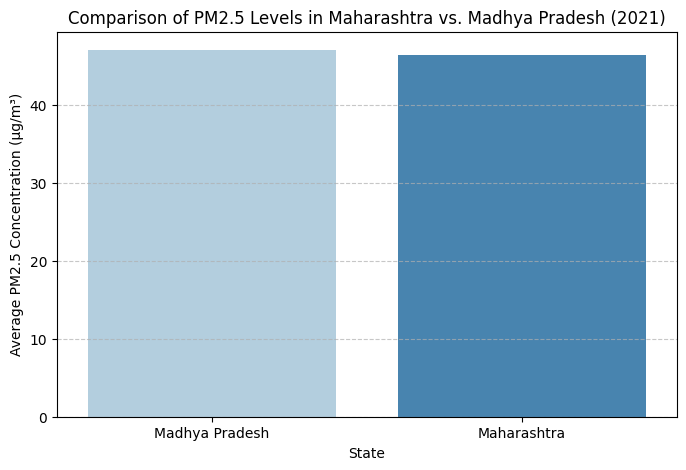

            state      pm2.5  population_density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


In [26]:
#ques3
df_clean.columns = df_clean.columns.str.strip().str.lower()

# 🔹 Step 2: Check for available columns
print(df_clean.columns)  # Verify correct column names

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')
# 🔹 Step 4: Filter data for 2021
df_clean['year'] = df_clean['timestamp'].dt.year  # Extract year
df_2021 = df_clean[df_clean['year'] == 2021]  # Keep only 2021 data

# 🔹 Step 5: Compute average PM2.5 levels for each state
state_pm25_2021 = df_2021.groupby('state', as_index=False)['pm2.5'].mean()

# 🔹 Step 6: Filter for Maharashtra and Madhya Pradesh
target_states = ["Maharashtra", "Madhya Pradesh"]
filtered_states = state_pm25_2021[state_pm25_2021['state'].isin(target_states)]

# 🔹 Step 7: Merge with state population and area data
# Assume state_info contains 'state', 'population', and 'area (km2)'
state_info.columns = state_info.columns.str.strip().str.lower()  # Normalize column names
merged_analysis = pd.merge(filtered_states, state_info, on='state', how='inner')

# 🔹 Step 8: Compute population density
merged_analysis['population_density'] = merged_analysis['population'] / merged_analysis['area (km2)']

# 🔹 Step 9: Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=merged_analysis['state'], y=merged_analysis['pm2.5'], palette="Blues")

plt.xlabel("State")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Comparison of PM2.5 Levels in Maharashtra vs. Madhya Pradesh (2021)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# 🔹 Step 10: Print Analysis
print(merged_analysis[['state', 'pm2.5', 'population_density']])


# Funding 

## Ques 1
Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [32]:
# import pandas as pd

data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
ncap_funding = pd.read_csv("NCAP_Funding.csv")
state_data = pd.read_csv("State_data.csv")

# Extract year from Timestamp
data["Year"] = data["Timestamp"].dt.year

# Filter for 2021 data
mask_2021 = data["Year"] == 2021
df_2021 = data[mask_2021].copy() # df_2021 might be just a "view" (a reference to a portion of data) rather than an independent copy.This ensures df_2021 is a new DataFrame in memory.

funded_states = set(ncap_funding["State"])

df_2021.loc[:,"Funded_or_not"] = df_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

# Compute average PM2.5 for funded and non-funded states
avg_pm25_funding = df_2021.groupby("Funded_or_not")["PM2.5"].mean()

print("Average PM2.5 levels (2021) for Funded vs Non-Funded States:\n", avg_pm25_funding)

# display(data)
# display(df_2021)


Average PM2.5 levels (2021) for Funded vs Non-Funded States:
 Funded_or_not
Funded        62.055055
Not Funded    60.326211
Name: PM2.5, dtype: float64


# Ques 2 Funding

Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12784\2543360624.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  assam_funding_cleaned = assam_funding.replace("-", 0).astype(float)


Total NCAP Funding for Assam by Year:
2020     0.36
2021    12.00
2022     0.00
dtype: float64
Year
2019    55.752773
2020    62.329410
2021    61.017780
2022    55.592354
2023    59.685088
2024    55.910395
Name: PM2.5, dtype: float64


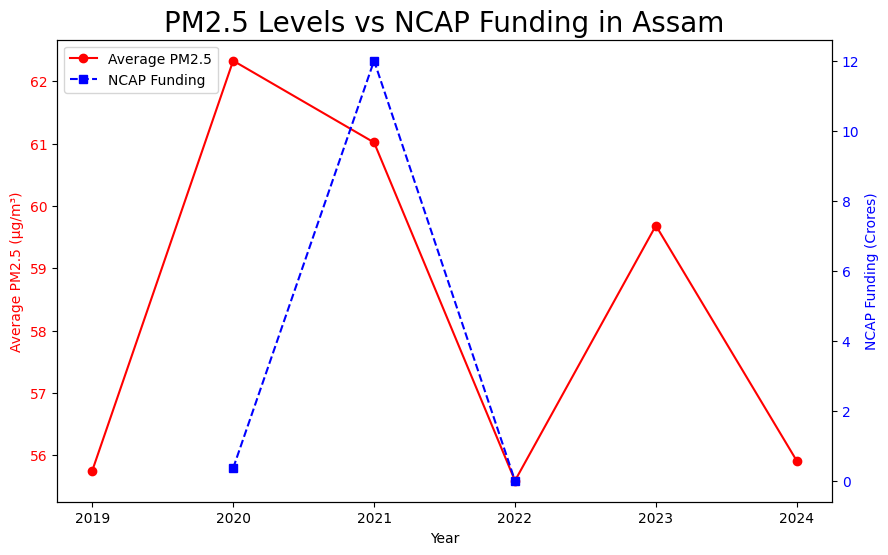

In [33]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load datasets
# data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
# ncap_funding = pd.read_csv("NCAP_Funding.csv")

# Extract year from Timestamp in the main dataset
data["Year"] = data["Timestamp"].dt.year

# Get Assam Air Quality Data
assam_data = data[data["state"] == "Assam"]

# Compute average PM2.5 for Assam by year
assam_pm25 = assam_data.groupby("Year")["PM2.5"].mean()

# --- Reshape NCAP Funding Data for Assam ---
# Filter funding data for Assam
assam_funding = ncap_funding[ncap_funding["State"] == "Assam"].iloc[:, 3:6]

# Replace '-' with 0 and convert to float
assam_funding_cleaned = assam_funding.replace("-", 0).astype(float)

# Sum funding for each year
funding_sums = assam_funding_cleaned.sum()
funding_sums.index = [2020, 2021, 2022]

# Display results
print("Total NCAP Funding for Assam by Year:")
print(funding_sums)

assam_data = data[data["state"] == "Assam"]
assam_pm25_by_year = assam_data.groupby("Year")["PM2.5"].mean()
assam_pm25_by_year = assam_pm25_by_year.iloc[2:]
print(assam_pm25_by_year)


# --- Plot the graph ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 on the left y-axis
ax1.plot(assam_pm25_by_year.index, assam_pm25_by_year.values, color="red", marker="o", label="Average PM2.5")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Plot NCAP funding on the right y-axis
ax2 = ax1.twinx()
ax2.plot(funding_sums.index, funding_sums.values, color="blue", marker="s", linestyle="--", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (Crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels vs NCAP Funding in Assam", fontsize=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()

✔️ Yes, increased funding in 2021 seems to have contributed to air quality improvements in 2022. \
✔️ The biggest PM2.5 drop happened one year after the ₹12 Crores funding.\
❌ However, PM2.5 levels increased again in 2023 when funding stopped. \
📌 This suggests that consistent funding & policy enforcement are needed for long-term air quality

# Ques 3
Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


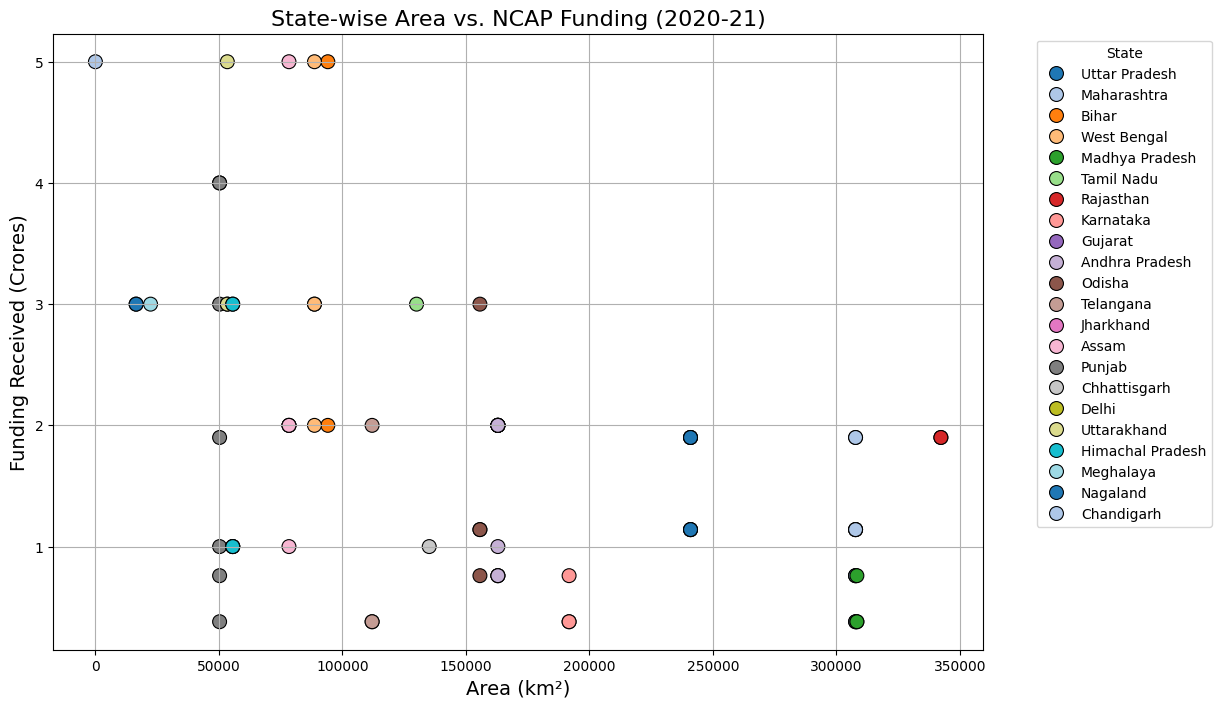

In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

# # Load datasets
# state_data = pd.read_csv("State_data.csv")  # Contains 'State', 'Area (km2)'
# ncap_funding = pd.read_csv("NCAP_Funding.csv")  # Contains 'State', 'Amount released during FY 2020-21'

# Convert funding to numeric (handle errors like missing or non-numeric values)
ncap_funding["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding["Amount released during FY 2020-21"], errors="coerce"
)

# Merge data on 'State'
merged_data = pd.merge(state_data, ncap_funding, on="State")

# Extract required columns
x = merged_data["Area (km2)"]  # X-axis (Area)
y = merged_data["Amount released during FY 2020-21"]  # Y-axis (Funding)
states = merged_data["State"]  # State names

# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot with unique colors for each state
scatter = sns.scatterplot(
    x=x, y=y, hue=states, palette="tab20", s=100, edgecolor="black"
)

# Customize plot
plt.xlabel("Area (km²)", fontsize=14)
plt.ylabel("Funding Received (Crores)", fontsize=14)
plt.title("State-wise Area vs. NCAP Funding (2020-21)", fontsize=16)

# Adjust legend (place it outside the plot)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.grid(True)
plt.show()


# Miscellaneous Questions

## Ques 1
For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [41]:
# import pandas as pd

# data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

data["Year"] = data["Timestamp"].dt.year

df_2023 = data[data["Year"] == 2023]

city_avg = df_2023.groupby("city")["PM2.5"].mean()
most_polluted_city = city_avg.idxmax()
print("Most polluted city in 2023:", most_polluted_city)

# For the most polluted city, compute daily average PM2.5
city_data = df_2023[df_2023["city"] == most_polluted_city].copy()
# display(city_data)

# Compute the daily average PM2.5 levels
daily_avg = city_data.groupby("Timestamp")["PM2.5"].mean()
# display(daily_avg)

# 3. Calculate the percentage of days with hazardous PM2.5 (> 300 µg/m³)
hazardous_days = (daily_avg > 300).sum()
total_days = daily_avg.shape[0]
percentage_hazardous = (hazardous_days / total_days) * 100

print(f"Total days in 2023 where days crossed hazardous level is {hazardous_days} and Percentage of days with PM2.5 above 300 µg/m³ in {most_polluted_city} in 2023: {percentage_hazardous:.2f}%")


Most polluted city in 2023: Darbhanga
Total days in 2023 where days crossed hazardous level is 3 and Percentage of days with PM2.5 above 300 µg/m³ in Darbhanga in 2023: 0.82%


# Ques 2
Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

the total number of spikes observed during 3 years are 6


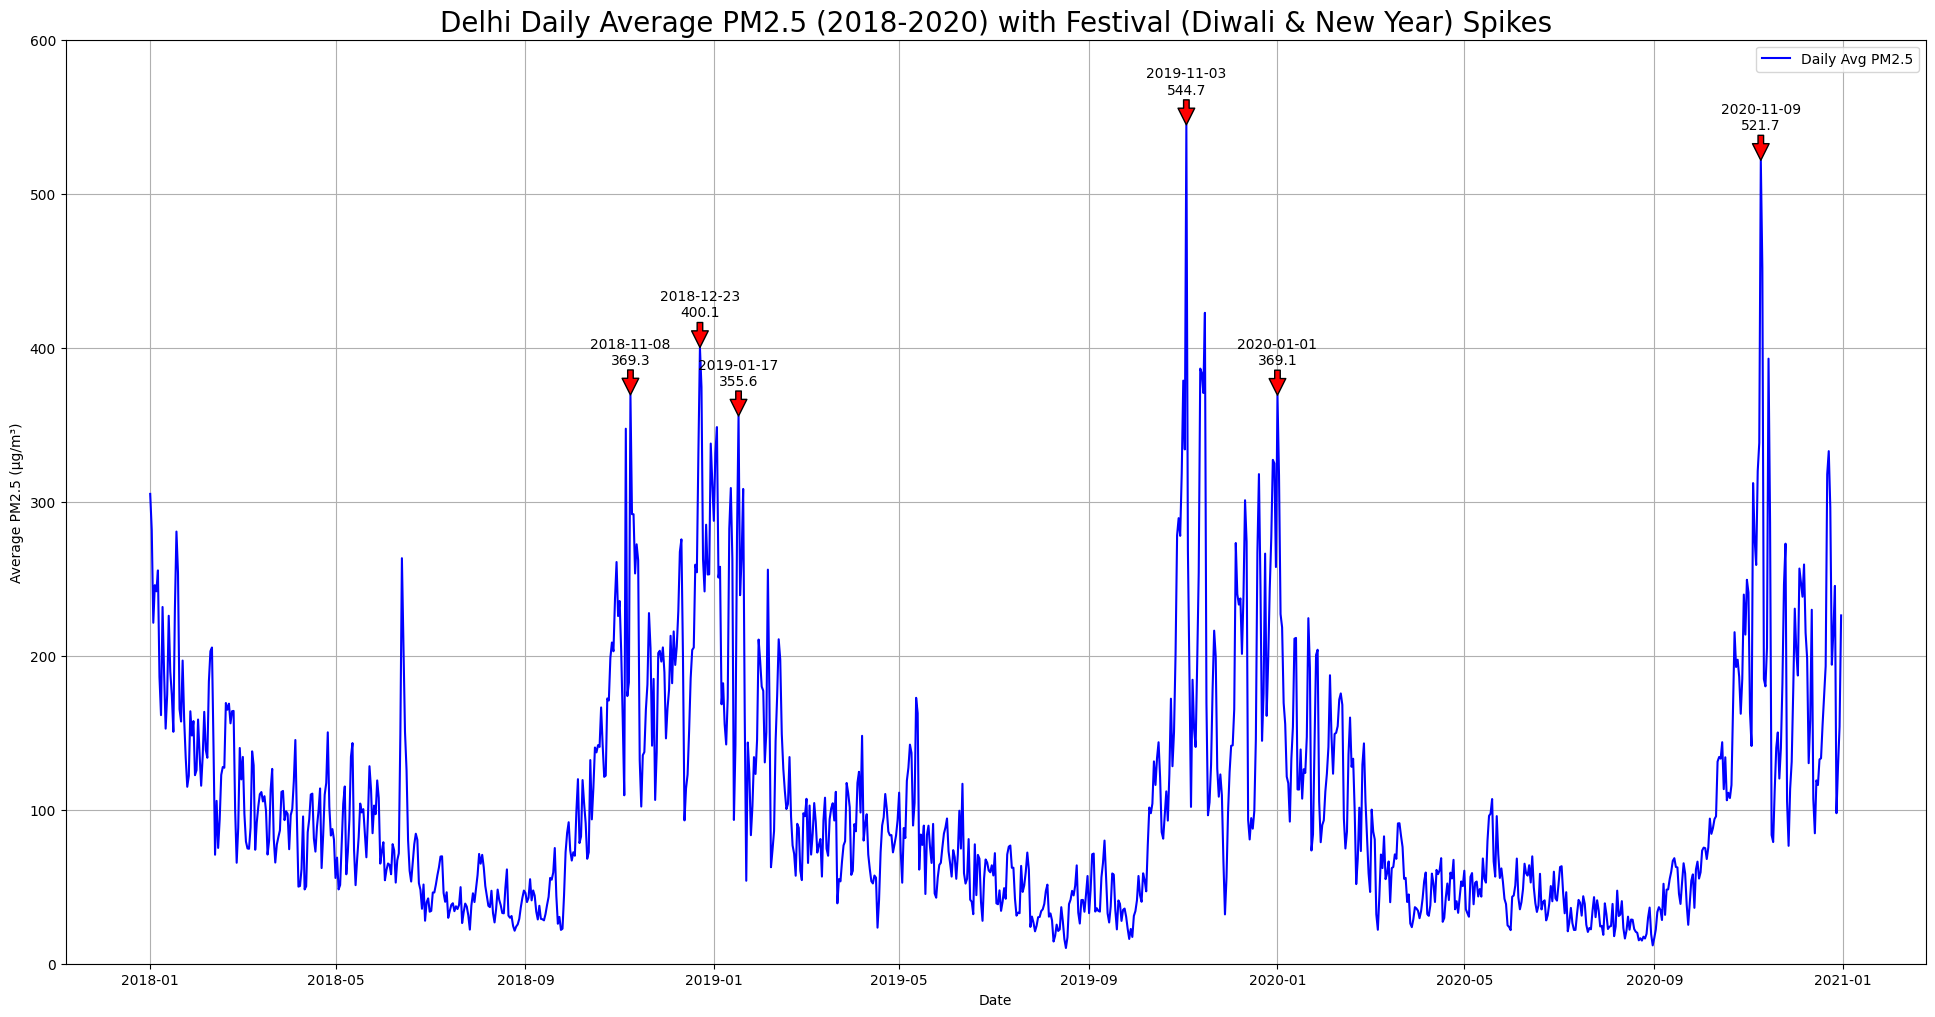

In [42]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the dataset with the Timestamp parsed as datetime
# data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

# Extract Year and Date columns
data["Year"] = data["Timestamp"].dt.year
data["Date"] = data["Timestamp"].dt.date

# Filter data for Delhi for the years 2018-2020
# (Assuming 'Delhi' appears in the "city" column)
delhi_data = data[(data["city"] == "Delhi") & (data["Year"].between(2018, 2020))]
# display(delhi_data)

# Compute the daily average PM2.5 for Delhi
daily_pm25 = delhi_data.groupby("Date")["PM2.5"].mean().reset_index()
# When you perform a groupby operation, by default the grouped column ("Date" in this case) becomes the index of the resulting object.
# Using reset_index() converts that index back into a regular column in the DataFrame. This makes it easier to work with 
# (for example, when plotting or merging with other DataFrames) because you can refer to "Date" as a standard column rather than as the index.
# display(daily_pm25)
# Convert the Date column to datetime for plotting
daily_pm25["Date"] = pd.to_datetime(daily_pm25["Date"])

# Create the time series plot of daily average PM2.5
plt.figure(figsize=(24, 12))
plt.plot(daily_pm25["Date"], daily_pm25["PM2.5"], label="Daily Avg PM2.5", color="blue")

# List to hold festival peaks for annotation
festival_peaks = []

# Loop over each year in the analysis period
for year in [2018, 2019, 2020]:
    # --- Diwali period: Consider October and November ---
    diwali_mask = (daily_pm25["Date"].dt.year == year) & (daily_pm25["Date"].dt.month.isin([10, 11]))
    diwali_data = daily_pm25[diwali_mask]
    # display(diwali_data)
    if not diwali_data.empty:
        # Find the day with the highest PM2.5 in the Diwali period
        diwali_peak = diwali_data.loc[diwali_data["PM2.5"].idxmax()]
        festival_peaks.append(diwali_peak)
    
    # --- New Year: Consider January of the same year ---
    new_year_mask = (daily_pm25["Date"].dt.year == year) & (daily_pm25["Date"].dt.month.isin([12, 1]))
    new_year_data = daily_pm25[new_year_mask]
    # display(new_year_data)
    if not new_year_data.empty:
        new_year_peak = new_year_data.loc[new_year_data["PM2.5"].idxmax()]
        festival_peaks.append(new_year_peak)
# display(festival_peaks)
# Annotate each festival spike with an arrow
for peak in festival_peaks:
    date_peak = peak["Date"]
    value_peak = peak["PM2.5"]
    plt.annotate(
        f"{date_peak.strftime('%Y-%m-%d')}\n{value_peak:.1f}",
        xy=(date_peak, value_peak), # The arrow points to the exact data coordinate (x = date_peak, y = value_peak)
        xytext=(date_peak, value_peak + 20), # The text label is positioned slightly above the point—20 units higher on the y-axis so it doesn't overlap the data point.
        arrowprops=dict(facecolor = "red"),
        horizontalalignment='center' # Centers the text horizontally around the specified xytext.
    )
print(f"the total number of spikes observed during 3 years are {len(festival_peaks)}")
plt.xlabel("Date")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.ylim(0, 600)
plt.title("Delhi Daily Average PM2.5 (2018-2020) with Festival (Diwali & New Year) Spikes", fontsize = 20 )
plt.legend()
plt.grid(True)
plt.show()


Yes, we observed spikes during these festivals and new year time 

# Ques 3 
Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]


State with highest NCAP funding in 2020: Andhra Pradesh
Total funding in FY 2020-21 (Crores): 17.28


Year
2017    46.966870
2018    38.158007
2019    33.899712
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
2024    33.274945
Name: PM2.5, dtype: float64

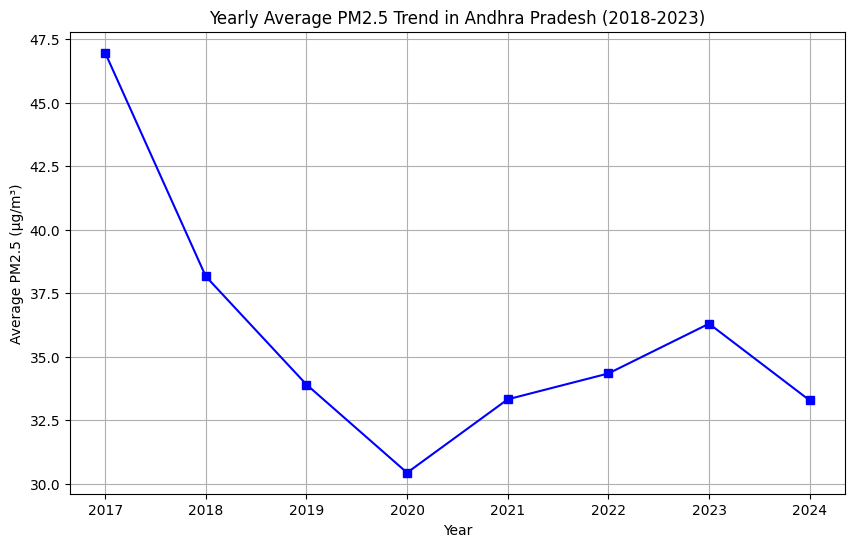

In [43]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load datasets
# data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
# ncap_funding = pd.read_csv("NCAP_Funding.csv")

# Convert the FY 2020-21 funding column to numeric (in crores)
ncap_funding["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding["Amount released during FY 2020-21"], errors="coerce" 
# "raise" (default): If any value cannot be converted to a number, raise an exception.
# "coerce": Convert problematic values to NaN (Not a Number), which is useful if you expect some non-numeric values and want to handle them later.
# "ignore": Return the original data if conversion fails.
)
# display(ncap_funding["Amount released during FY 2020-21"])

state_funding_2020 = ncap_funding.groupby("State")["Amount released during FY 2020-21"].sum()
# display(state_funding_2020)

highest_state = state_funding_2020.idxmax()
highest_funding_value = state_funding_2020.max()

print("State with highest NCAP funding in 2020:", highest_state)
print("Total funding in FY 2020-21 (Crores):", highest_funding_value)

# Extract year from Timestamp in the main dataset
data["Year"] = data["Timestamp"].dt.year

# Filter the data for the identified state
state_data = data[data["state"] == highest_state]

# Compute yearly average PM2.5 levels
yearly_avg_pm25 = state_data.groupby("Year")["PM2.5"].mean()
display(yearly_avg_pm25)


plt.figure(figsize=(10,6))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='s', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Trend in {highest_state} (2018-2023)")
plt.grid(True)
plt.show()


Although Andhra Pradesh received the highest NCAP funding in 2020 and saw significant improvements in air quality up to that point, the upward trend in PM2.5 levels post-2020 implies that the initial benefits were not maintained by 2023.


# Ques 4
Draw the map of India and plot the sensor locations on the map.[1.5 Mark]


In [52]:
%pip install cartopy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 9.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.0 MB 6.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 6.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 6.0 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 6.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


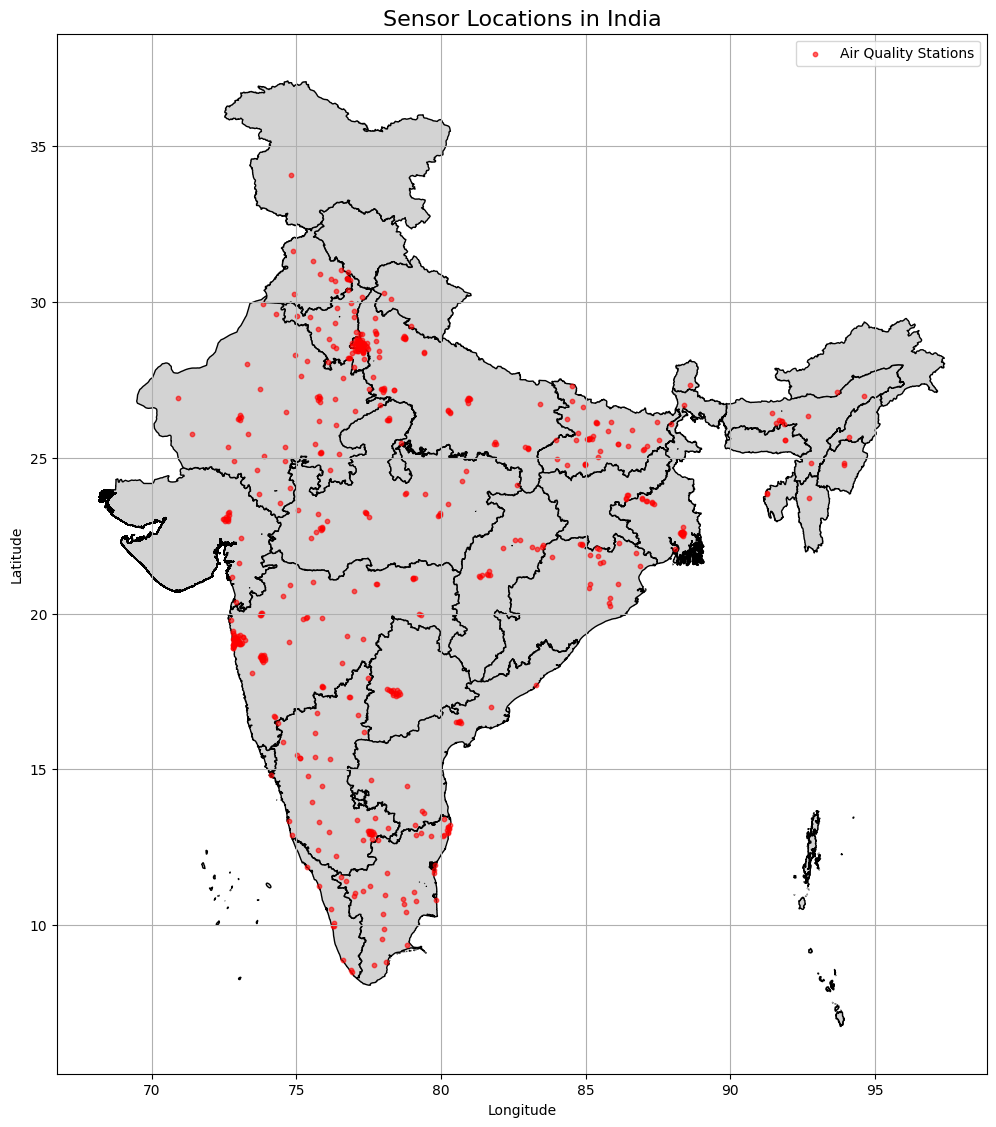

In [58]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import geopandas as gpd

# Load the India shapefile
india_map = gpd.read_file("archive/India States/indian_states.shp")

# Load the sensor data
data = pd.read_csv("Data.csv")

# Drop missing values and duplicate latitude-longitude pairs
data = data.dropna(subset=["latitude", "longitude"]).drop_duplicates(subset=["latitude", "longitude"])
# display(data.head())

# Extract longitude and latitude for plotting
x = data["longitude"]  # Longitude (X-axis)
y = data["latitude"]   # Latitude (Y-axis)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))

# Plot India map
india_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot sensor locations
ax.scatter(x, y, color="red", marker="o", s=10, alpha=0.6, label="Air Quality Stations")

# Customize plot
plt.title("Sensor Locations in India", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Bonus

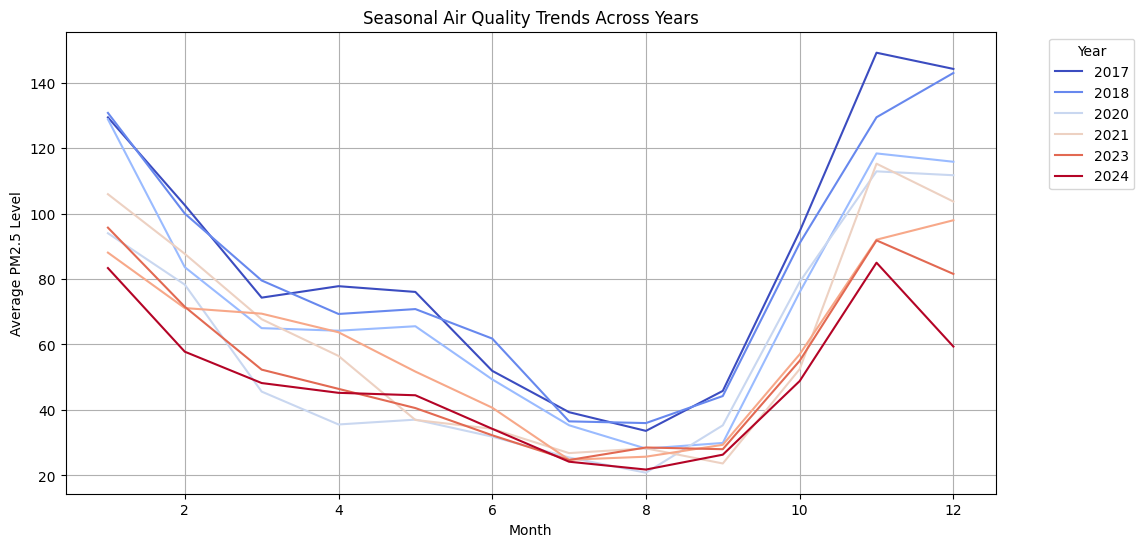

Insight: The seasonal trends indicate that winter months consistently show higher PM2.5 levels, suggesting the need for targeted air quality control measures during this period.


In [ ]:
# 5. Additional Insight: Seasonal Air Quality Trends
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
data["Year"] = data["Timestamp"].dt.year
data["Month"] = data["Timestamp"].dt.month
seasonal_trends = data.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_trends, x="Month", y="PM2.5", hue="Year", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Level")
plt.title("Seasonal Air Quality Trends Across Years")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

print("Insight: The seasonal trends indicate that winter months consistently show higher PM2.5 levels, suggesting the need for targeted air quality control measures during this period.")